<a href="https://colab.research.google.com/github/ivanpalenciab/prediccion-precio-maiz/blob/Segunda_fase/Arima_emd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [ ]:
modo_1 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/modo_1.csv")
modo_2 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/modo_2.csv")
modo_3 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/modo_3.csv")
modo_4 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/modo_4.csv")
modo_5 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/modo_5.csv")
residuo = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/descompocion-ensamble/emd_modes/residuo.csv")
modo_1["Fecha"] = pd.to_datetime(modo_1["Fecha"],format='%Y-%m-%d')
modo_2["Fecha"] = pd.to_datetime(modo_2["Fecha"],format='%Y-%m-%d')
modo_3["Fecha"] = pd.to_datetime(modo_3["Fecha"],format='%Y-%m-%d')
modo_4["Fecha"] = pd.to_datetime(modo_4["Fecha"],format='%Y-%m-%d')
modo_5["Fecha"] = pd.to_datetime(modo_5["Fecha"],format='%Y-%m-%d')
residuo["Fecha"] = pd.to_datetime(residuo["Fecha"],format='%Y-%m-%d')
modo_1.set_index("Fecha", inplace=True)
modo_2.set_index("Fecha", inplace=True)
modo_3.set_index("Fecha", inplace=True)
modo_4.set_index("Fecha", inplace=True)
modo_5.set_index("Fecha", inplace=True)
residuo.set_index("Fecha", inplace=True)

In [ ]:
modo_1.head()

,Precio_Cierre
Fecha,
2021-06-29,-13.343663
2021-06-28,13.688422
2021-06-25,-10.156557
2021-06-24,5.949337
2021-06-23,-5.093190


In [ ]:
modos = [ modo_1 , modo_2 , modo_3 , modo_4]
data = modo_1 + modo_2 + modo_3 + modo_4 + modo_5 + residuo
data.head(5)

,Precio_Cierre
Fecha,
2021-06-29,531.00
2021-06-28,557.50
2021-06-25,530.00
2021-06-24,547.25
2021-06-23,544.25


<Axes: xlabel='Fecha'>

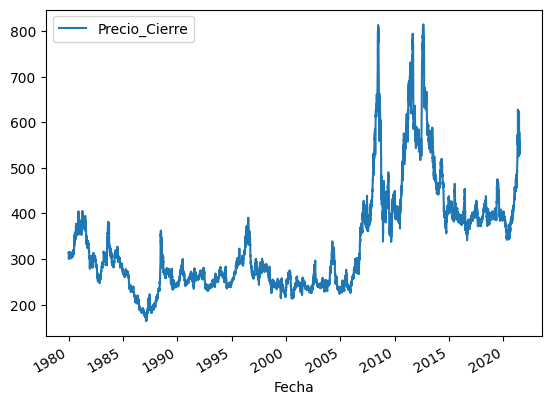

In [ ]:
data.plot()

In [ ]:
modo_1 = modo_1.asfreq('D')
modo_2 = modo_2.asfreq('D')
modo_3 = modo_3.asfreq('D')
modo_4 = modo_4.asfreq('D')
modo_5 = modo_5.asfreq('D')
residuo = residuo.asfreq('D')
modo_1.interpolate(inplace=True)
modo_2.interpolate(inplace=True)
modo_3.interpolate(inplace=True)
modo_4.interpolate(inplace=True)
modo_5.interpolate(inplace=True)
residuo.interpolate(inplace=True)

# Modelado modo 1

In [ ]:
total_datos=len(modo_1.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
division_validacion = division_entrenamiento + int(porcentaje_validacion*total_datos)

datos_entrenamiento = modo_1[:division_entrenamiento]
datos_validacion = modo_1[division_entrenamiento:division_validacion]
datos_testeo = modo_1[division_validacion:total_datos]

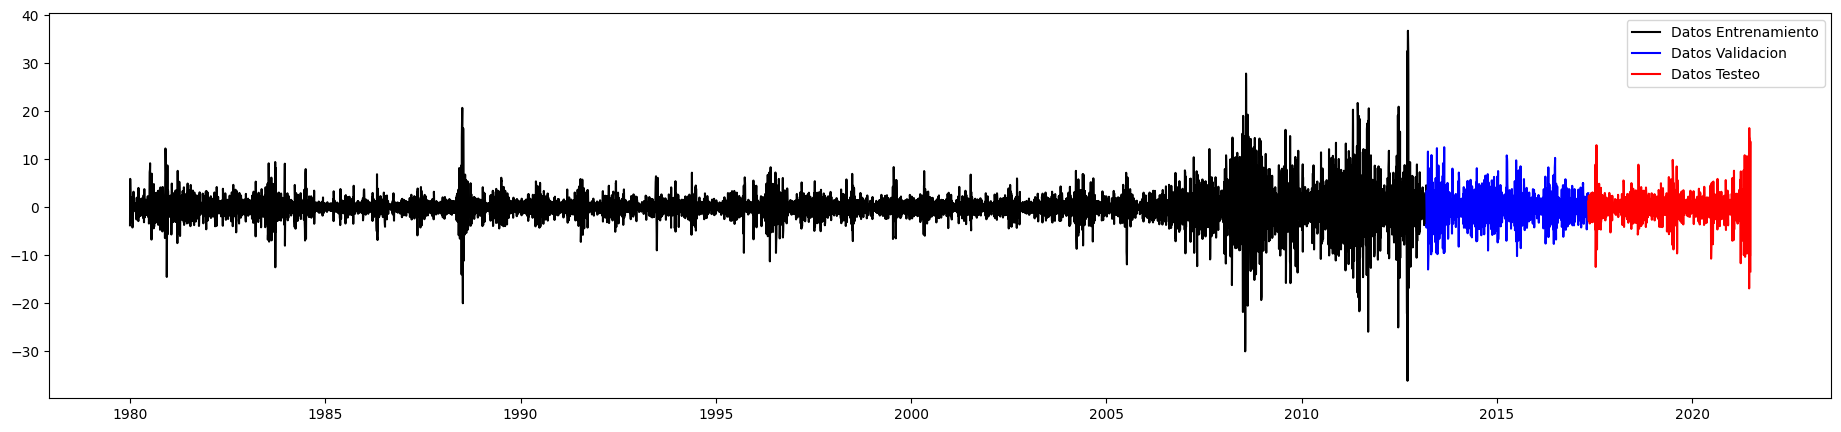

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 2.4281981047846894e-30


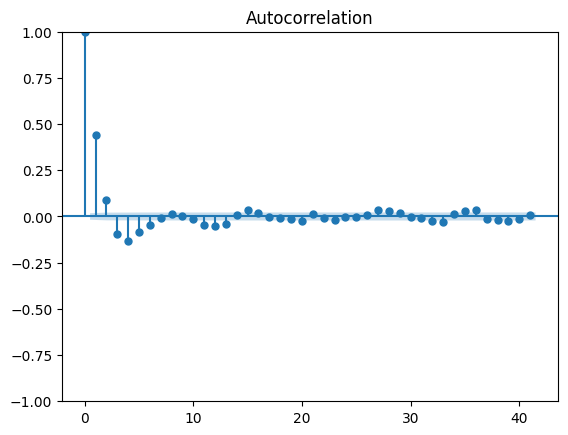

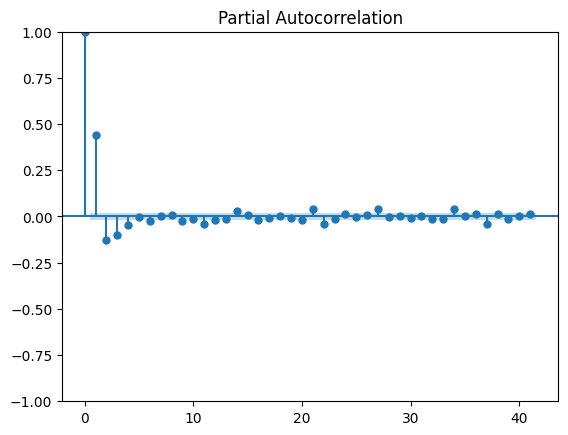

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(3, 0, 3),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -29699.638
Date:                Tue, 11 Jun 2024   AIC                          59415.276
Time:                        17:42:28   BIC                          59474.500
Sample:                    01-02-1980   HQIC                         59435.133
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.035     -0.050      0.960      -0.070       0.066
ar.L1          0.3778      0.402      0.939      0.348      -0.411       1.167
ar.L2          0.2016      0.408      0.494      0.6

In [ ]:
predicciones_modo_1 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_modo_1)
mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre, predicciones_modo_1)
rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre, predicciones_modo_1))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 1.93705064557861
mape : 0.9980380793629853
rmse : 2.8051016997400775


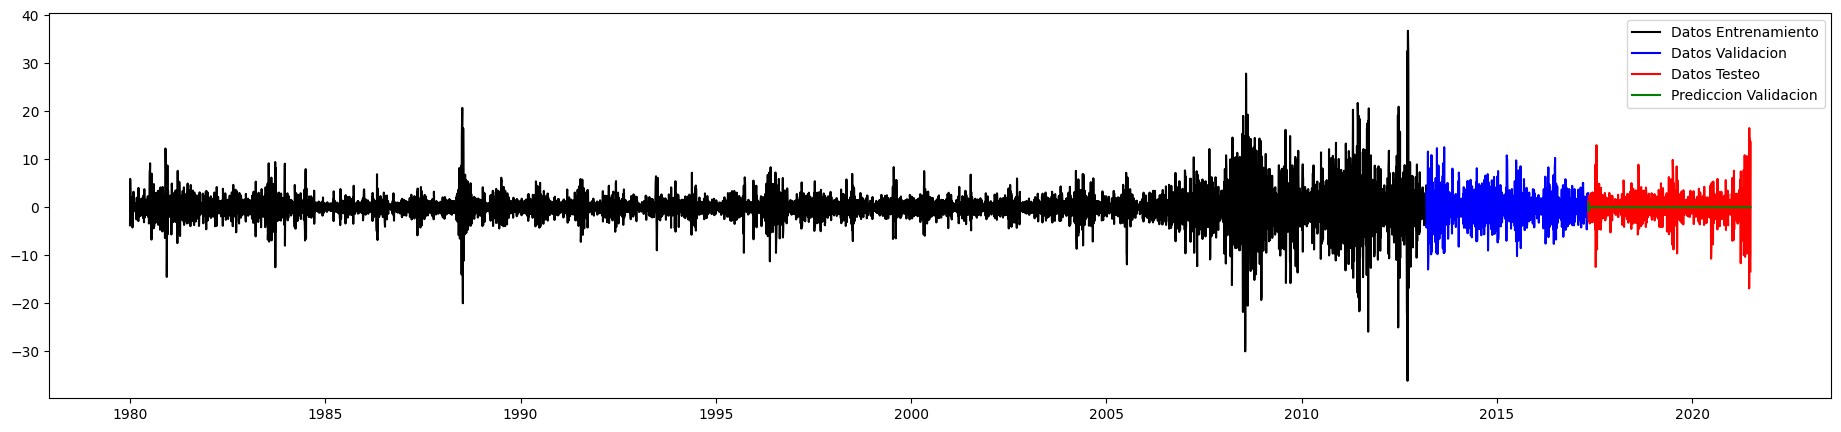

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(datos_testeo.index, predicciones_modo_1, color="Green", label="Prediccion Validacion" )
ax.legend(loc = 'upper right')
plt.show()

# modelamos modo 2

In [ ]:
total_datos=len(modo_2.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.2
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
datos_entrenamiento = modo_2[:division_entrenamiento]
datos_testeo = modo_2[division_entrenamiento:total_datos]

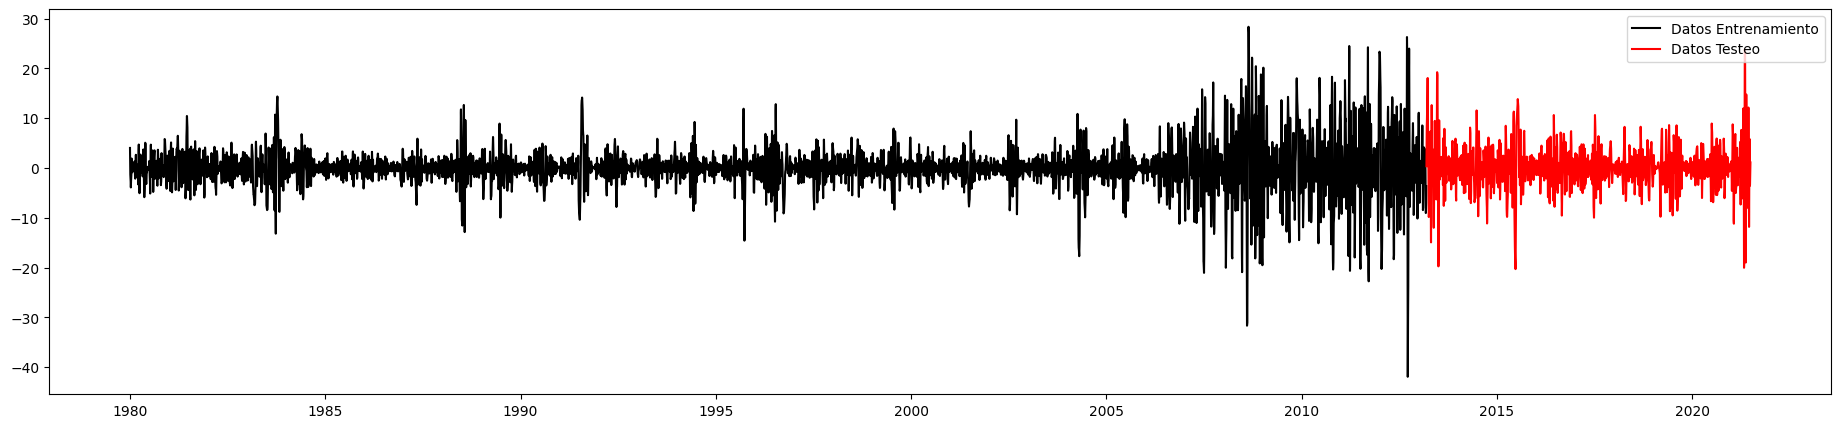

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 0.0


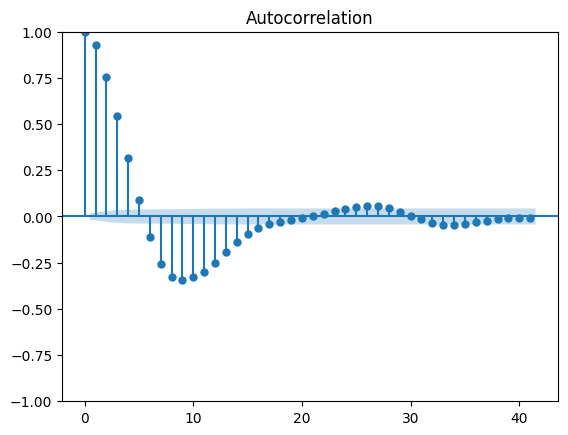

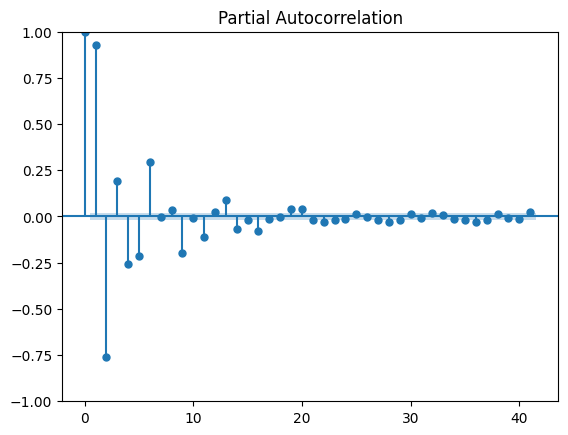

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(5, 0, 5),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(5, 0, 5)   Log Likelihood              -16097.517
Date:                Tue, 11 Jun 2024   AIC                          32219.034
Time:                        17:33:09   BIC                          32307.870
Sample:                    01-02-1980   HQIC                         32248.819
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.078     -0.179      0.858      -0.167       0.139
ar.L1          1.3085      0.011    119.987      0.000       1.287       1.330
ar.L2         -0.5047      0.019    -26.876      0.0

In [ ]:
predicciones_modo_2 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_modo_2)
mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre,predicciones_modo_2)
rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre,predicciones_modo_2))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 2.9627621069148184
mape : 1.011160969633069
rmse : 4.32770488780425


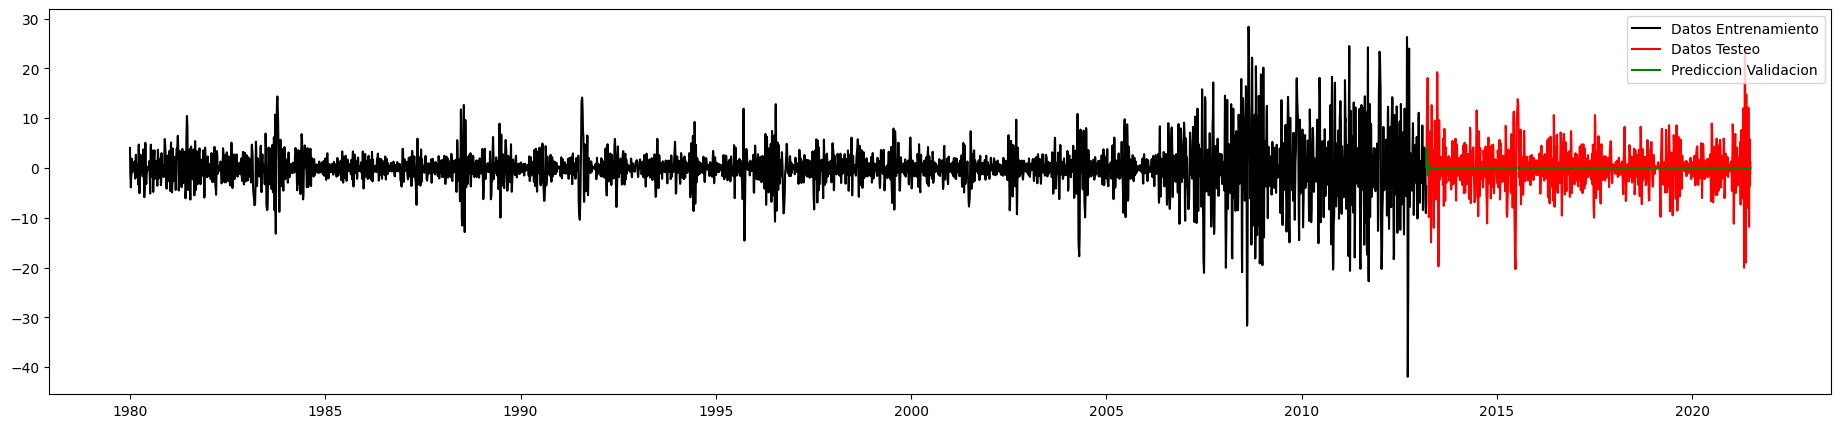

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
#ax.plot(datos_validacion.Fecha,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(datos_testeo.index, predicciones_modo_2, color="Green", label="Prediccion Validacion" )
ax.legend(loc = 'upper right')
plt.show()

# Modelado modo 3

In [ ]:
total_datos=len(modo_3.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.2
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
datos_entrenamiento = modo_3[:division_entrenamiento]
datos_testeo = modo_3[division_entrenamiento:total_datos]

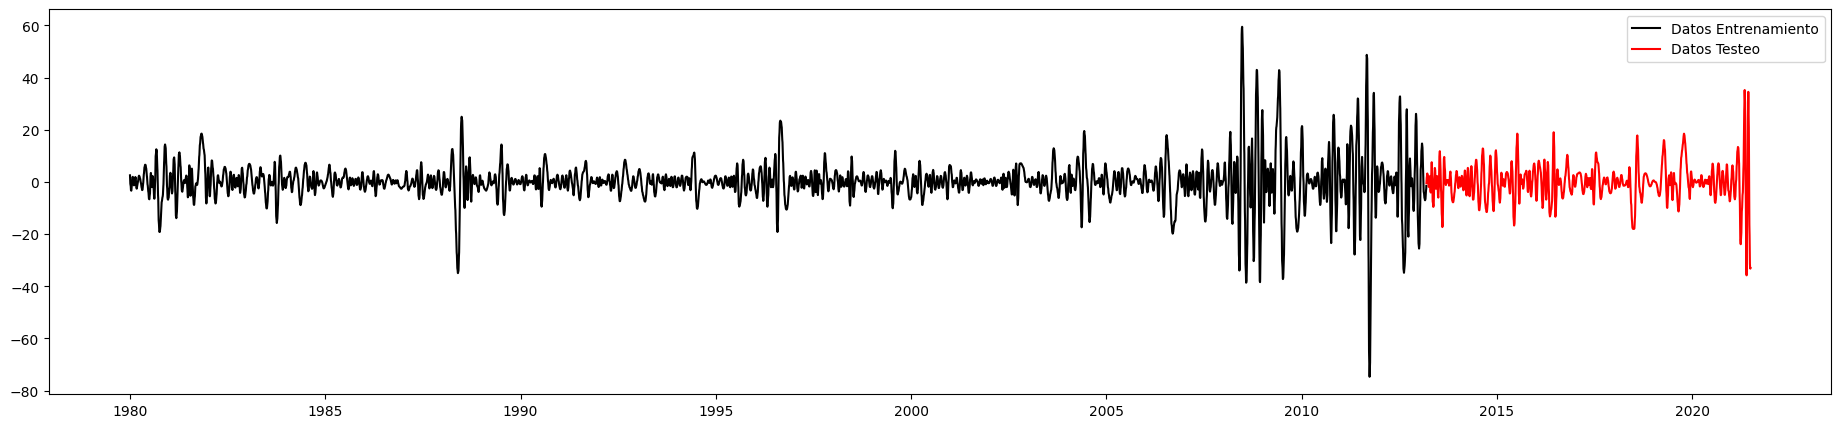

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 2.2545238084149665e-30


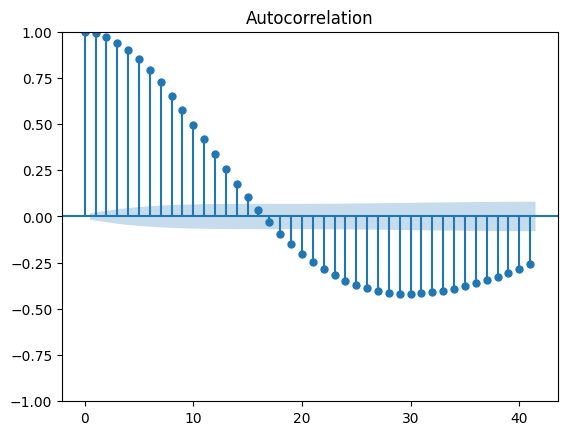

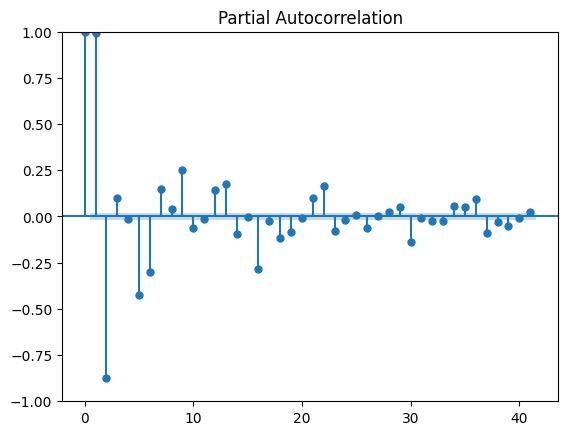

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(5, 0, 5),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -6339.007
Date:                Tue, 11 Jun 2024   AIC                          12702.014
Time:                        17:34:38   BIC                          12790.849
Sample:                    01-02-1980   HQIC                         12731.798
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1040      0.200      0.519      0.604      -0.289       0.497
ar.L1          1.9952      0.007    292.415      0.000       1.982       2.009
ar.L2         -1.1486      0.018    -63.497      0.0

In [ ]:
predicciones_modo_3 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_modo_3)
mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre, predicciones_modo_3)
rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre,predicciones_modo_3))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 4.824863348994774
mape : 2.4028005513923265
rmse : 7.062186678779333


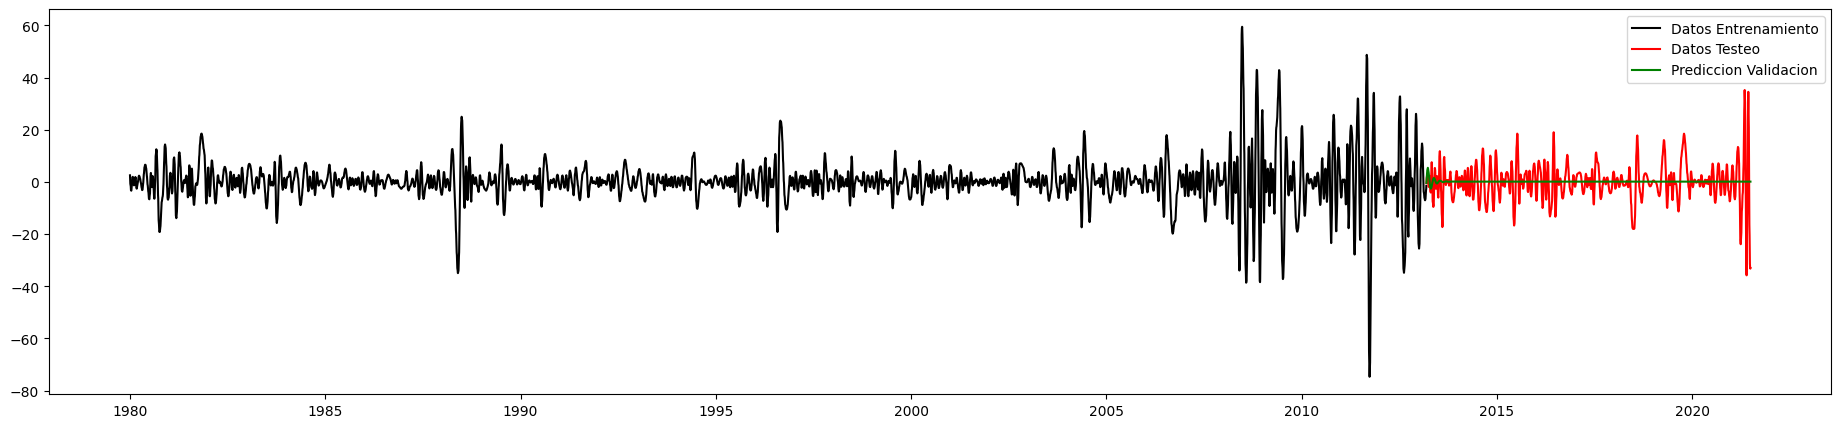

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
#ax.plot(datos_validacion.Fecha,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(datos_testeo.index, predicciones_modo_3, color="Green", label="Prediccion Validacion" )
ax.legend(loc = 'upper right')
plt.show()

# modelado modo 4

In [ ]:
total_datos=len(modo_4.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
division_validacion = division_entrenamiento + int(porcentaje_validacion*total_datos)


datos_entrenamiento = modo_4[:division_entrenamiento]
datos_validacion = modo_4[division_entrenamiento:division_validacion]
datos_testeo = modo_4[division_validacion:total_datos]

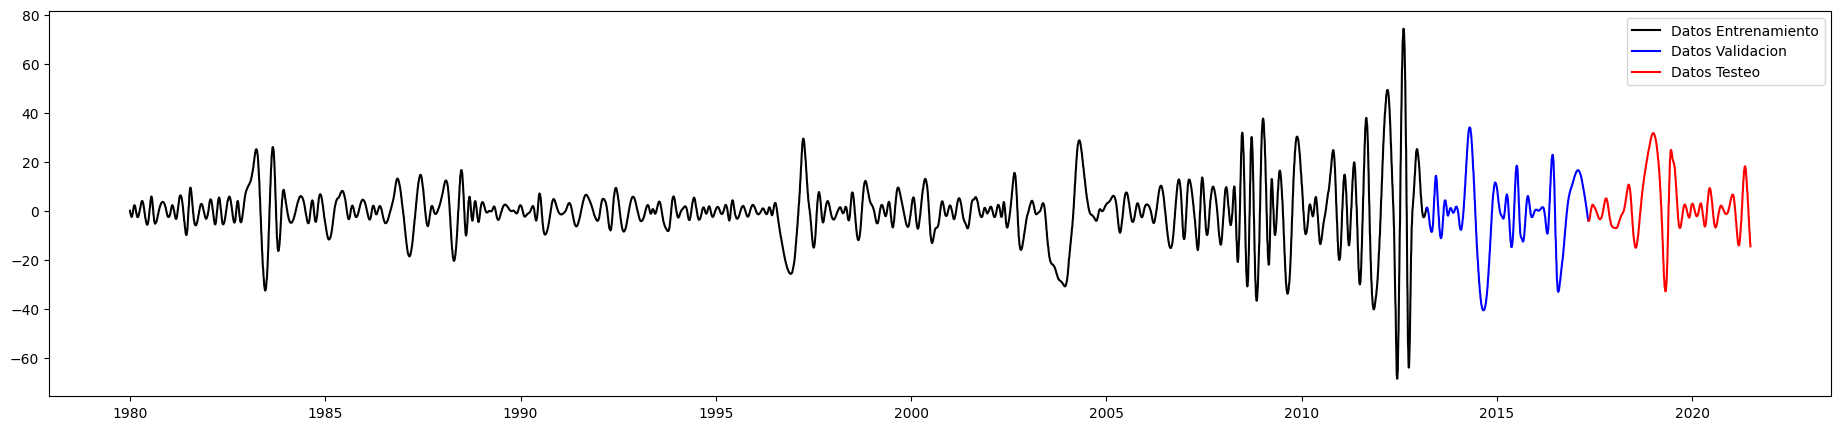

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 3.9826706848366645e-25


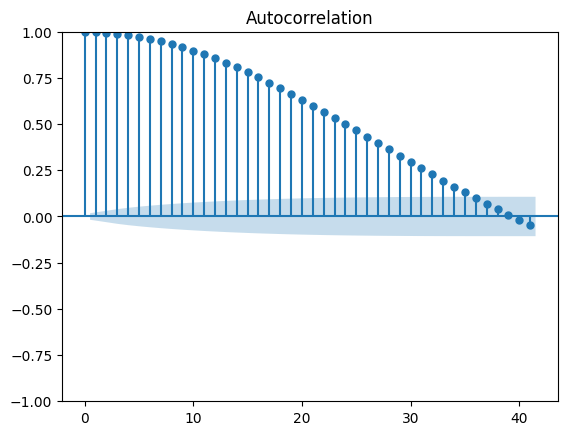

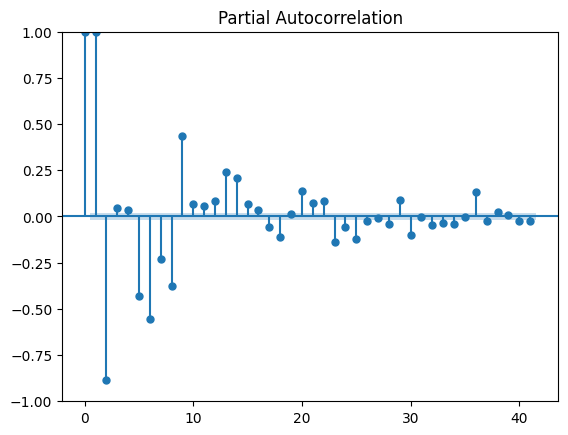

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
#p=[1,2,3,4,5,6]
#q = [1,2,3,4,5]
#d = [0,1,2]

#errores = []


#for i in p:
 # for j in q:
  #  for k in d:
   #   modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(i, k,j),dates=datos_entrenamiento.index)
    #  modelo_entrenado=modelo.fit()
     # predicciones_modo_4 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)
      #mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_modo_4)
      #mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre, predicciones_modo_4)
      #rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre, predicciones_modo_4))
      #errores.append((i,j,k,mape,rmse))

In [ ]:
#errores

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(6, 0, 2),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(6, 0, 2)   Log Likelihood                2359.582
Date:                Tue, 11 Jun 2024   AIC                          -4699.163
Time:                        17:35:57   BIC                          -4625.134
Sample:                    01-02-1980   HQIC                         -4674.343
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1508      0.299     -0.504      0.614      -0.737       0.435
ar.L1          1.4523      0.002    582.445      0.000       1.447       1.457
ar.L2          0.2033      0.005     39.853      0.0

In [ ]:
validacion_modo_4 =  modelo_entrenado.forecast(len(datos_validacion),dynamic=True)
validacion_modo_4_df = pd.DataFrame(validacion_modo_4)
validacion_modo_4_df = validacion_modo_4_df.rename(columns={"predicted_mean":"Precio_Cierre"})
entrenamiento_validacion_m4 = pd.concat([datos_entrenamiento,validacion_modo_4_df])


In [ ]:
modelo = ARIMA(entrenamiento_validacion_m4.Precio_Cierre, order=(6, 0, 2),dates=entrenamiento_validacion_m4.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                13639
Model:                 ARIMA(6, 0, 2)   Log Likelihood                3439.489
Date:                Tue, 11 Jun 2024   AIC                          -6858.977
Time:                        17:37:12   BIC                          -6783.770
Sample:                    01-02-1980   HQIC                         -6833.908
                         - 05-05-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1488      0.240     -0.621      0.535      -0.619       0.321
ar.L1          1.4928      0.002    618.934      0.000       1.488       1.498
ar.L2          0.1330      0.005     26.828      0.0

In [ ]:
predicciones_modo_4  = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
mae = mean_absolute_error(datos_validacion.Precio_Cierre, validacion_modo_4)
mape = mean_absolute_percentage_error(datos_validacion.Precio_Cierre, validacion_modo_4)
rmse = np.sqrt(mean_squared_error(datos_validacion.Precio_Cierre, validacion_modo_4))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 10.470096490630796
mape : 1.2963868732373711
rmse : 14.686672953735162


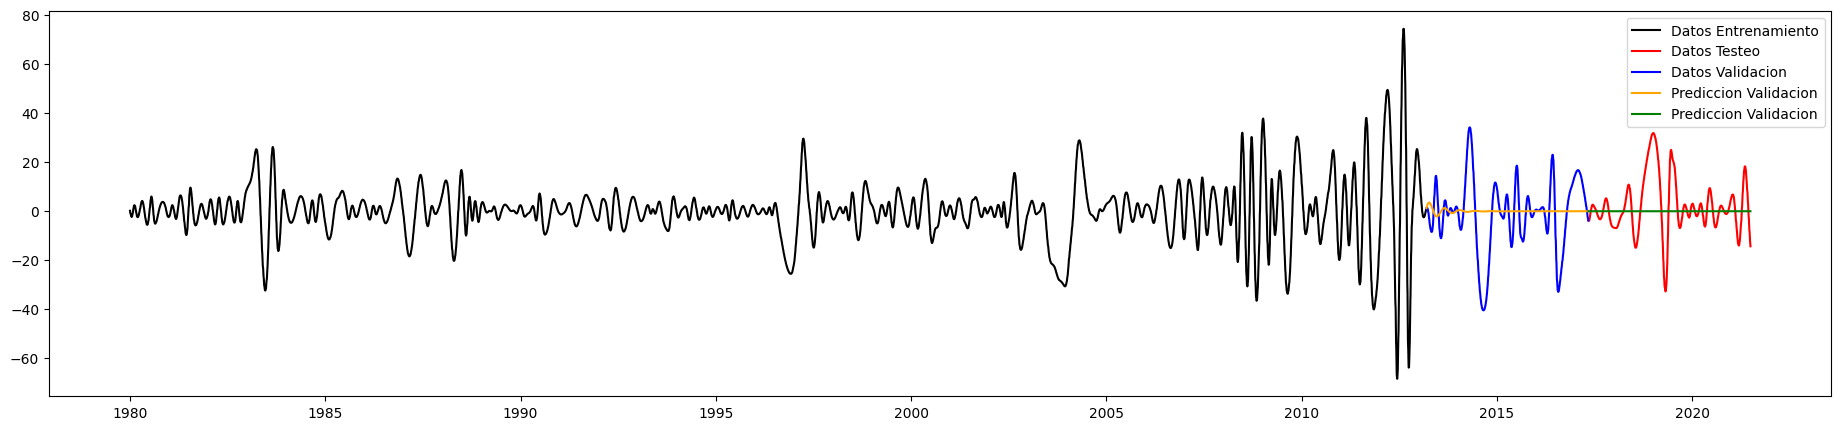

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
#ax.plot(datos_validacion.Fecha,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_validacion.index, validacion_modo_4, color="Orange", label="Prediccion Validacion" )
ax.plot(datos_testeo.index, predicciones_modo_4, color="Green", label="Prediccion Validacion" )
ax.legend(loc = 'upper right')
plt.show()

# Modelado modo 5

In [ ]:
total_datos=len(modo_5.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
division_validacion = division_entrenamiento + int(porcentaje_validacion*total_datos)


datos_entrenamiento = modo_5[:division_entrenamiento]
datos_validacion = modo_5[division_entrenamiento:division_validacion]
datos_testeo = modo_5[division_validacion:total_datos]

In [ ]:
#total_datos=len(modo_5.Precio_Cierre)
#porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.2
#division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
#datos_entrenamiento = modo_5[:division_entrenamiento]
#datos_testeo = modo_5[division_entrenamiento:total_datos]

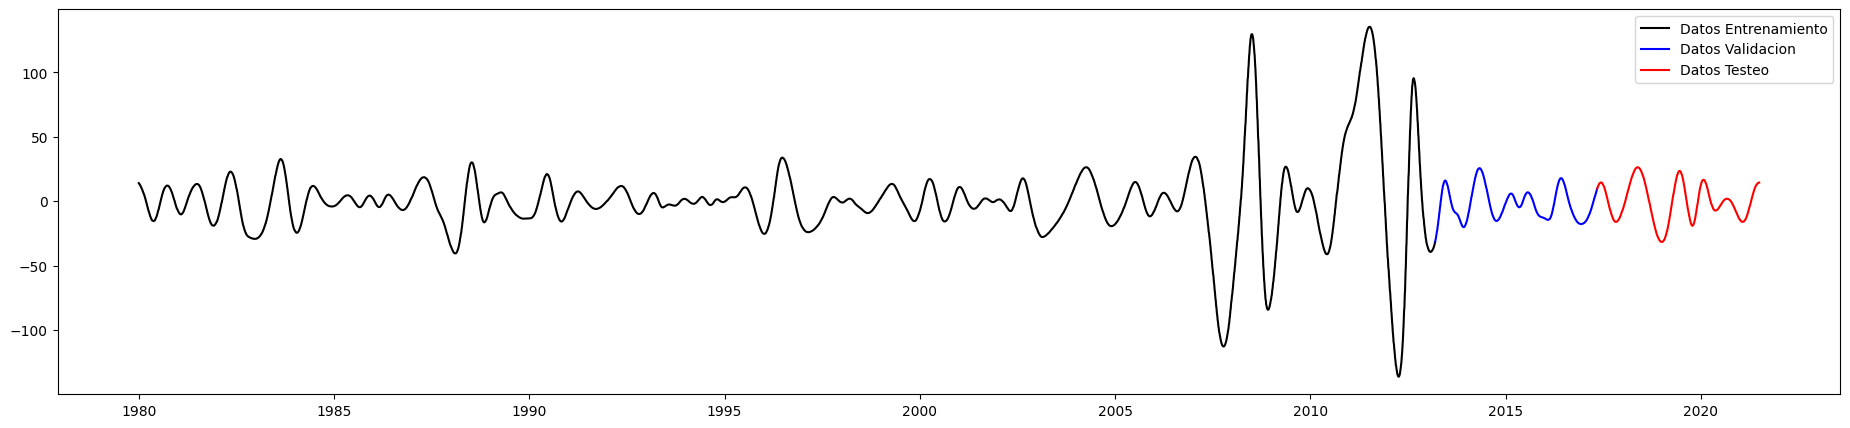

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 2.2478061161081868e-08


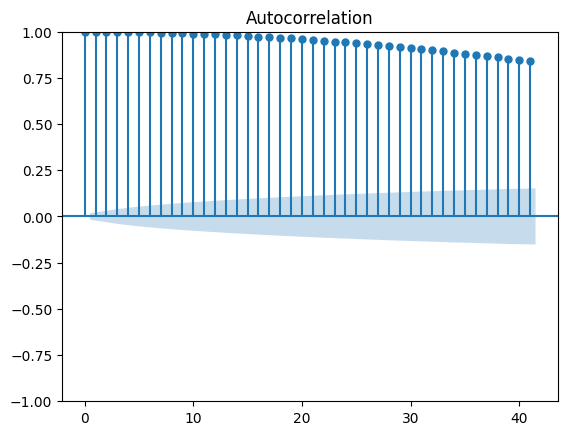

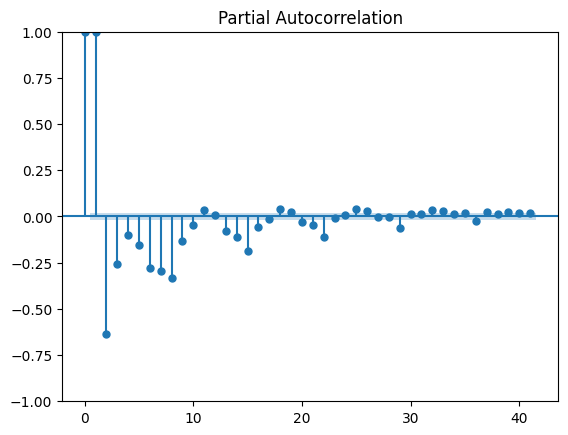

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
#p=[1,2,3,4,5,6]
#q = [1,2,3,4,5]
#d = [0,1,2]

#errores = []


#for i in p:
 # for j in q:
  #  for k in d:
   #   modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(i, k, j),dates=datos_entrenamiento.index)
    #  modelo_entrenado=modelo.fit()
    #  predicciones_modo_5 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)
     # mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_modo_5)
      #mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre, predicciones_modo_5)
      #rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre, predicciones_modo_5))
      #errores.append((i,j,k,mape,rmse))

In [ ]:
#errores

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(6, 0, 2),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(6, 0, 2)   Log Likelihood                6746.169
Date:                Tue, 11 Jun 2024   AIC                         -13472.337
Time:                        17:38:33   BIC                         -13398.308
Sample:                    01-02-1980   HQIC                        -13447.517
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7918      0.740     -1.071      0.284      -2.241       0.658
ar.L1          1.5128      0.002    703.894      0.000       1.509       1.517
ar.L2          0.1125      0.004     25.340      0.0

In [ ]:
validacion_modo_5= modelo_entrenado.forecast(len(datos_validacion),dynamic=True)
validacion_modo_5_df = pd.DataFrame(validacion_modo_5)
validacion_modo_5_df = validacion_modo_5_df.rename(columns={"predicted_mean":"Precio_Cierre"})
entrenamiento_validacion_m5 = pd.concat([datos_entrenamiento,validacion_modo_5_df])



In [ ]:
modelo = ARIMA(entrenamiento_validacion_m5.Precio_Cierre, order=(6, 0, 2),dates=entrenamiento_validacion_m5.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                13639
Model:                 ARIMA(6, 0, 2)   Log Likelihood                8431.033
Date:                Tue, 11 Jun 2024   AIC                         -16842.067
Time:                        17:39:49   BIC                         -16766.860
Sample:                    01-02-1980   HQIC                        -16816.997
                         - 05-05-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7686      0.718     -1.070      0.285      -2.177       0.639
ar.L1          1.5479      0.002    801.866      0.000       1.544       1.552
ar.L2          0.0531      0.004     13.289      0.0

In [ ]:
predicciones_modo_5 = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
mae = mean_absolute_error(datos_validacion.Precio_Cierre, validacion_modo_5)
mape = mean_absolute_percentage_error(datos_validacion.Precio_Cierre, validacion_modo_5)
rmse = np.sqrt(mean_squared_error(datos_validacion.Precio_Cierre, validacion_modo_5))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 10.01429232844946
mape : 1.6299843865618258
rmse : 11.916722134049865


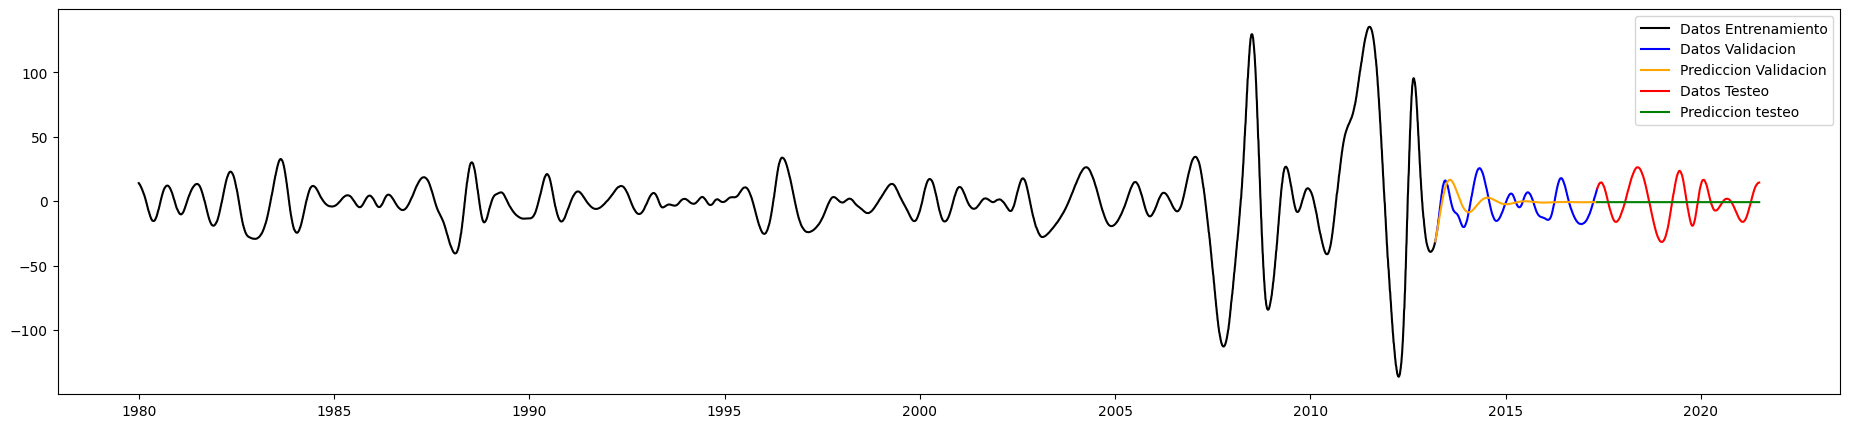

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(validacion_modo_5.index, validacion_modo_5, color="orange", label="Prediccion Validacion" )
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(predicciones_modo_5.index, predicciones_modo_5, color="Green", label="Prediccion testeo" )
ax.legend(loc = 'upper right')
plt.show()

# Modelado Residuo

In [ ]:
total_datos=len(residuo.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
division_validacion = division_entrenamiento + int(porcentaje_validacion*total_datos)


datos_entrenamiento = residuo[:division_entrenamiento]
datos_validacion = residuo[division_entrenamiento:division_validacion]
datos_testeo = residuo[division_validacion:total_datos]

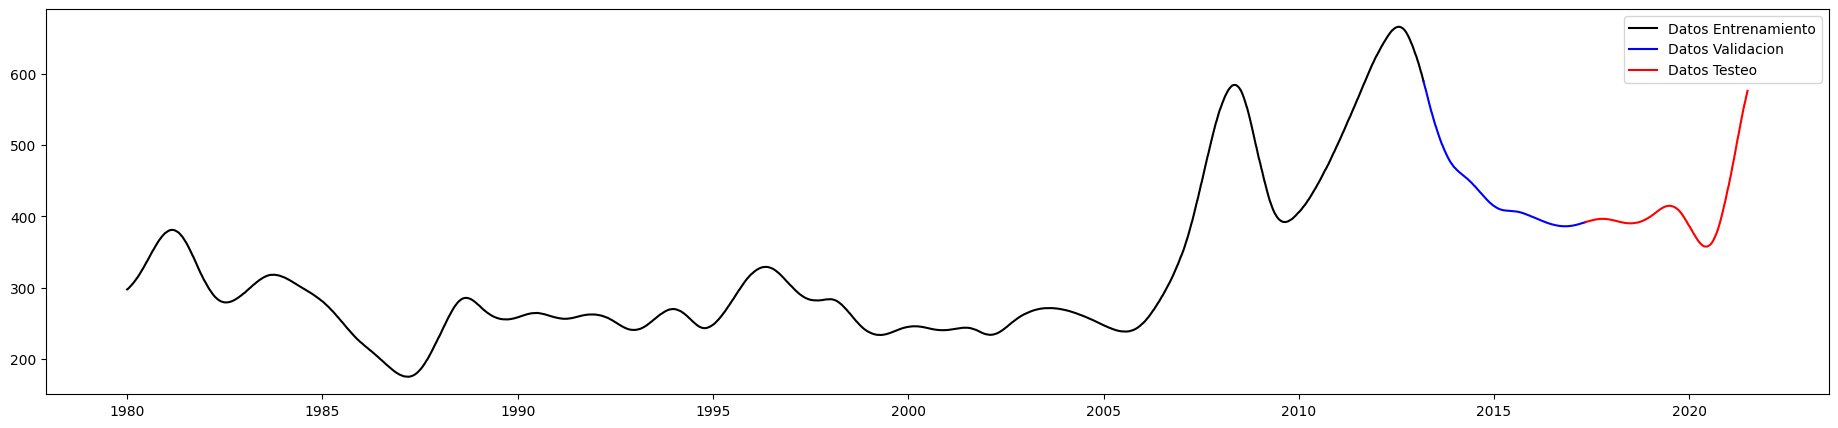

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datos_entrenamiento.Precio_Cierre)
print(f'p-valor: {adf_test[1]}')

p-valor: 2.9412573987854408e-08


In [ ]:
#import pmdarima as pm
#auto_arima = pm.auto_arima(datos_entrenamiento.Precio_Cierre, stepwise=True, seasonal=False)
#auto_arima

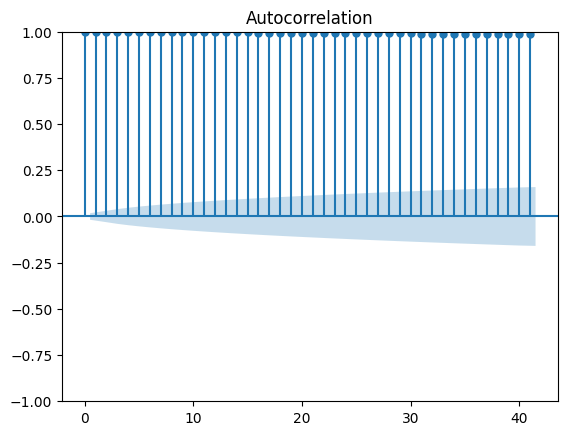

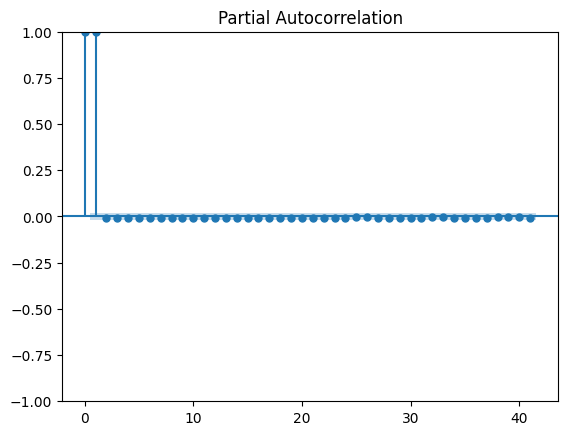

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(datos_entrenamiento.Precio_Cierre )
Pacf_original = plot_pacf(datos_entrenamiento.Precio_Cierre )

In [ ]:
#p=[1,2,3,4,5,6]
#q = [1,2,3,4,5]
#d = [0,1,2]

#errores = []


#for i in p:
 # for j in q:
  #  for k in d:
   #   modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(i, k, j),dates=datos_entrenamiento.index)
    #  modelo_entrenado=modelo.fit()
     # predicciones_residuo = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)
      #mae = mean_absolute_error(datos_testeo.Precio_Cierre, predicciones_residuo)
      #mape = mean_absolute_percentage_error(datos_testeo.Precio_Cierre, predicciones_residuo)
      #rmse = np.sqrt(mean_squared_error(datos_testeo.Precio_Cierre, predicciones_residuo))
      #errores.append((i,j,k,mape,rmse))

In [ ]:
#errores

In [ ]:
modelo = ARIMA(datos_entrenamiento.Precio_Cierre, order=(6, 1, 1),dates=datos_entrenamiento.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                12124
Model:                 ARIMA(6, 1, 1)   Log Likelihood               17241.856
Date:                Tue, 11 Jun 2024   AIC                         -34467.711
Time:                        17:40:12   BIC                         -34408.488
Sample:                    01-02-1980   HQIC                        -34447.855
                         - 03-12-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7435      0.007    105.979      0.000       0.730       0.757
ar.L2          0.0900      0.009     10.106      0.000       0.073       0.107
ar.L3         -0.3333      0.007    -48.235      0.0

In [ ]:
validacion_residuo = modelo_entrenado.forecast(len(datos_validacion),dynamic=True)

In [ ]:
validacion_residuo_df = pd.DataFrame(validacion_residuo)

In [ ]:
validacion_residuo_df = validacion_residuo_df.rename(columns={"predicted_mean":"Precio_Cierre"})

In [ ]:
entrenamiento_validacion = pd.concat([datos_entrenamiento,validacion_residuo_df])


<Axes: >

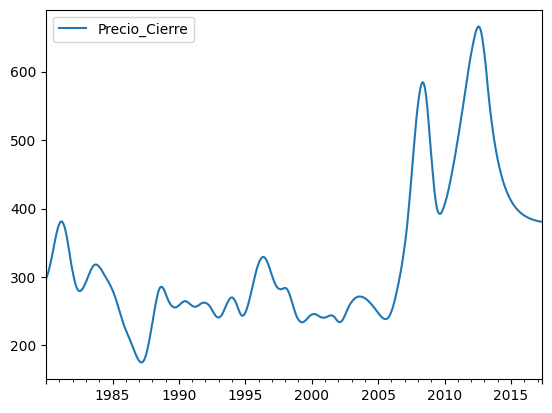

In [ ]:
entrenamiento_validacion.plot()

In [ ]:
modelo = ARIMA(entrenamiento_validacion.Precio_Cierre, order=(6, 1, 1),dates=entrenamiento_validacion.index)
modelo_entrenado=modelo.fit()
print(modelo_entrenado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Precio_Cierre   No. Observations:                13639
Model:                 ARIMA(6, 1, 1)   Log Likelihood               20183.798
Date:                Tue, 11 Jun 2024   AIC                         -40351.596
Time:                        17:40:36   BIC                         -40291.431
Sample:                    01-02-1980   HQIC                        -40331.540
                         - 05-05-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7551      0.006    120.088      0.000       0.743       0.767
ar.L2          0.0680      0.008      8.324      0.000       0.052       0.084
ar.L3         -0.3184      0.006    -49.975      0.0

In [ ]:
predicciones_residuo = modelo_entrenado.forecast(len(datos_testeo),dynamic=True)

In [ ]:
predicciones_residuo

2017-05-06    380.463142
2017-05-07    380.454242
2017-05-08    380.445365
2017-05-09    380.436514
2017-05-10    380.427688
                 ...    
2021-06-25    377.220628
2021-06-26    377.220478
2021-06-27    377.220329
2021-06-28    377.220179
2021-06-29    377.220030
Freq: D, Name: predicted_mean, Length: 1516, dtype: float64

In [ ]:
mae = mean_absolute_error(datos_validacion.Precio_Cierre, validacion_residuo)
mape = mean_absolute_percentage_error(datos_validacion.Precio_Cierre, validacion_residuo)
rmse = np.sqrt(mean_squared_error(datos_validacion.Precio_Cierre, validacion_residuo))

print(f'mae : {mae}')
print(f'mape : {mape}')
print(f'rmse : {rmse}')

mae : 6.106080023754549
mape : 0.014515809716320311
rmse : 6.72510099417274


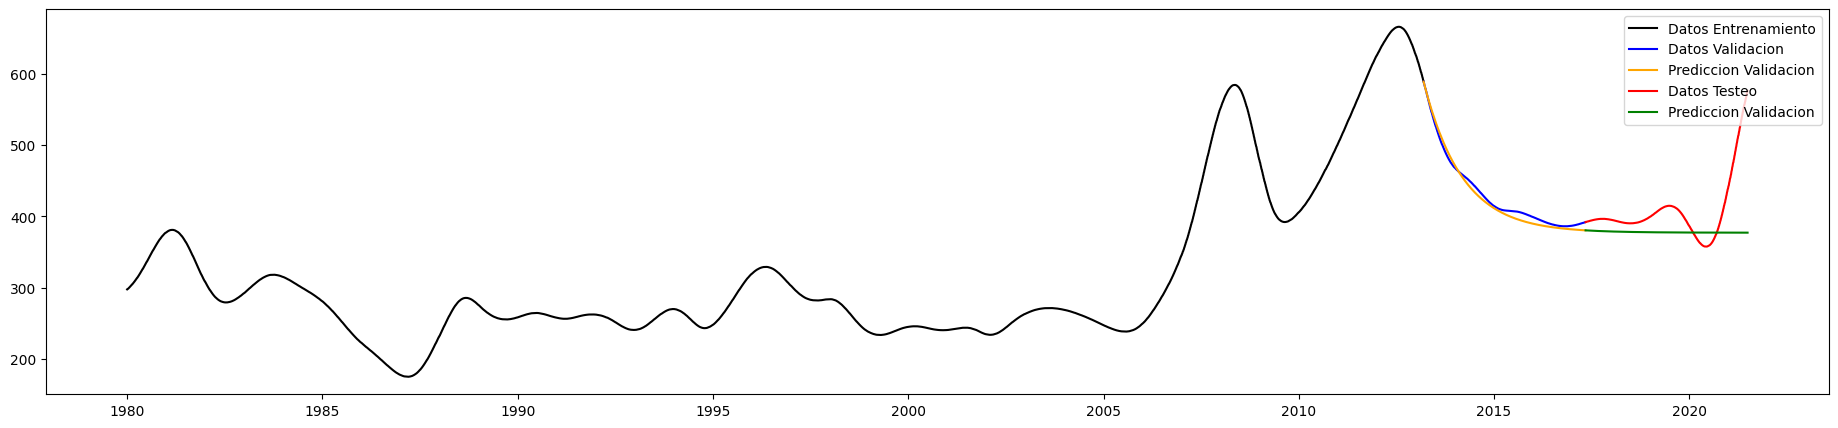

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_validacion.index, validacion_residuo, color="Orange", label="Prediccion Validacion" )
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(predicciones_residuo.index, predicciones_residuo, color="Green", label="Prediccion Validacion" )
ax.legend(loc = 'upper right')
plt.show()

# Ensemble

In [ ]:
#datos_emd = modo_1.Precio_Cierre + modo_2.Precio_Cierre + modo_3.Precio_Cierre +
datos_emd =  modo_4.Precio_Cierre + modo_5.Precio_Cierre + residuo.Precio_Cierre
#predicciones_emd = predicciones_modo_1 + predicciones_modo_2 + predicciones_modo_3 +
testeo = predicciones_modo_4 + predicciones_modo_5 + predicciones_residuo
datos_emd = datos_emd.to_frame()

In [ ]:
predicciones_modo_4.index

DatetimeIndex(['2017-05-06', '2017-05-07', '2017-05-08', '2017-05-09',
               '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-13',
               '2017-05-14', '2017-05-15',
               ...
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', length=1516, freq='D')

In [ ]:
predicciones_residuo

2017-05-06    380.463142
2017-05-07    380.454242
2017-05-08    380.445365
2017-05-09    380.436514
2017-05-10    380.427688
                 ...    
2021-06-25    377.220628
2021-06-26    377.220478
2021-06-27    377.220329
2021-06-28    377.220179
2021-06-29    377.220030
Freq: D, Name: predicted_mean, Length: 1516, dtype: float64

In [ ]:
total_datos=len(datos_emd.Precio_Cierre)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)
division_validacion = division_entrenamiento + int(porcentaje_validacion*total_datos)

datos_entrenamiento = datos_emd[:division_entrenamiento]
datos_validacion = datos_emd[division_entrenamiento:division_validacion]
datos_testeo = datos_emd[division_validacion:total_datos]

In [ ]:
validacion =  validacion_residuo + validacion_modo_4 + validacion_modo_5

In [ ]:
recm_validacion = np.sqrt(mean_squared_error( validacion,datos_validacion.Precio_Cierre))
eam_validacion = mean_absolute_error( validacion,datos_validacion.Precio_Cierre)
EPAM_validacion = mean_absolute_percentage_error( validacion,datos_validacion.Precio_Cierre)


#Imprimir las metricas de validacion del modelo
print ( f'La raiz del error cuadratico medio del modelo es: {recm_validacion} ' )
print ( f'el error absoluto medio del modelo es: {eam_validacion} ' )
print(f"Error porcentual absoluto medio del modelo es: {EPAM_validacion}")

La raiz del error cuadratico medio del modelo es: 22.55643702047256 
el error absoluto medio del modelo es: 16.82758780298624 
Error porcentual absoluto medio del modelo es: 0.03927560495306549


In [ ]:
#testeo = predicciones_modo_4 + predicciones_modo_5 #+ predicciones_residuo

In [ ]:
recm_validacion = np.sqrt(mean_squared_error( testeo,datos_testeo.Precio_Cierre))
eam_validacion = mean_absolute_error( testeo,datos_testeo.Precio_Cierre)
EPAM_validacion = mean_absolute_percentage_error( testeo,datos_testeo.Precio_Cierre)


#Imprimir las metricas de validacion del modelo
print ( f'La raiz del error cuadratico medio del modelo es: {recm_validacion} ' )
print ( f'el error absoluto medio del modelo es: {eam_validacion} ' )
print(f"Error porcentual absoluto medio del modelo es: {EPAM_validacion}")

La raiz del error cuadratico medio del modelo es: 56.024100958499446 
el error absoluto medio del modelo es: 35.58745083785823 
Error porcentual absoluto medio del modelo es: 0.0944652003770023


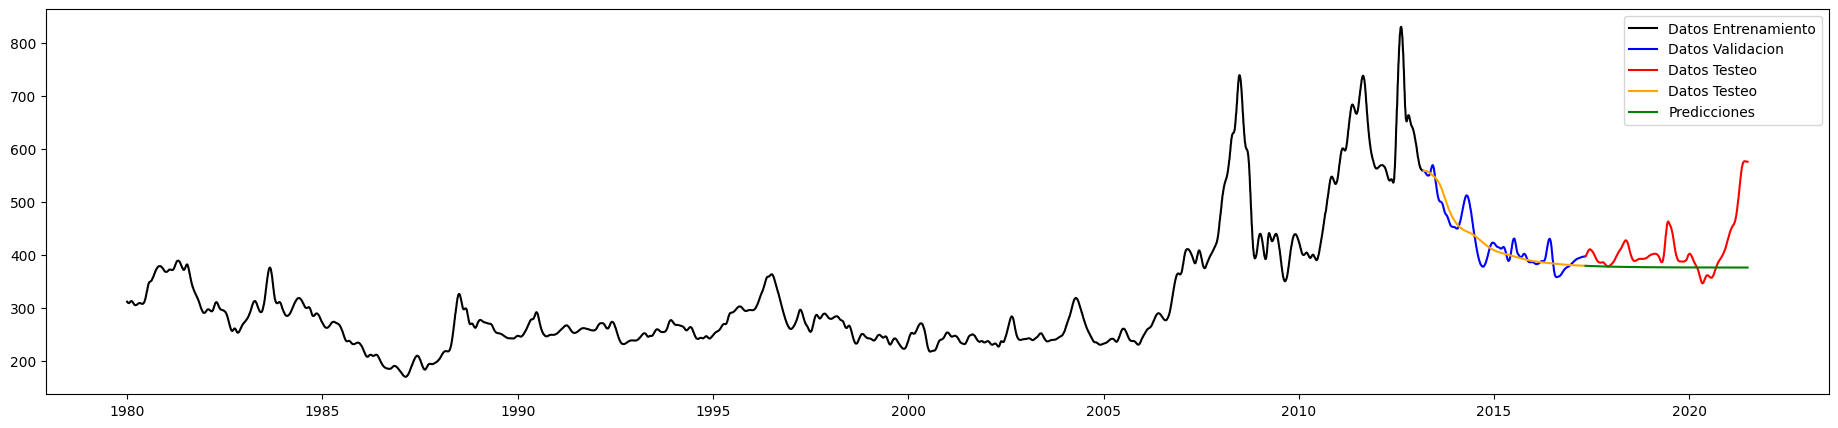

In [ ]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.Precio_Cierre,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_validacion.index,datos_validacion.Precio_Cierre,color='blue',label = 'Datos Validacion')
ax.plot(datos_testeo.index,datos_testeo.Precio_Cierre,color='red',label = 'Datos Testeo')
ax.plot(datos_validacion.index,validacion,color='orange',label = 'Datos Testeo')
ax.plot(datos_testeo.index,testeo,color='Green',label = 'Predicciones')
ax.legend(loc = 'upper right')
plt.show()